# Draw the Plot of SHAP with all Variables

In [1]:
%pwd

'/home/GPU/ML_GallupWellBeingResearch/Code'

In [2]:
%cd ..

/home/GPU/ML_GallupWellBeingResearch


/home/GPU/miniconda3/envs/rapids-24.06/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Import Package

In [3]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd

## Plot SHAP

### Load Dataset

In [4]:
filename_list = glob('Results/ShapAll_120k/*')

In [5]:
len(filename_list)

120

In [6]:
df_list = []
for filename in filename_list:
    sing_df = pd.read_parquet(filename)
    df_list.append(sing_df)

In [7]:
Concat_Shap = pd.concat(df_list, axis=0)

In [8]:
Concat_Shap.shape

(120000, 127)

### Plot

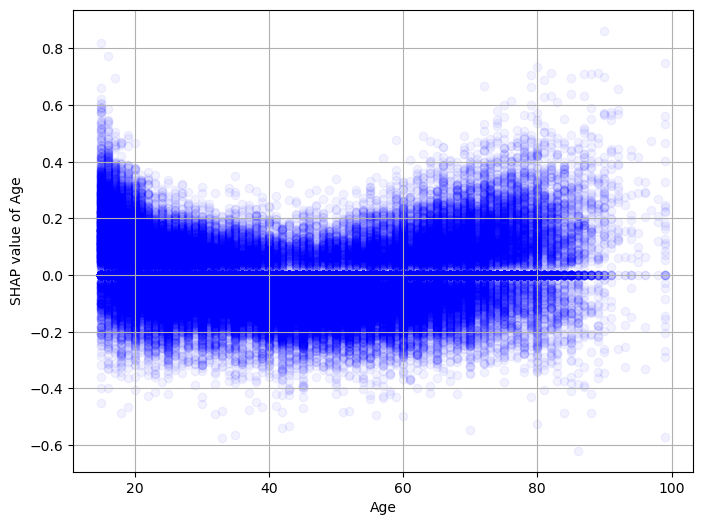

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(Concat_Shap['Age'], Concat_Shap['Age_shap'], color='blue', alpha = 0.05)
plt.xlabel('Age')
plt.ylabel('SHAP value of Age')
plt.grid(True)
plt.savefig('Figures/AgeSHAP.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()